In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, feature, filters, morphology

In [2]:
img_full = np.array(io.imread('image01.png'))
img_crop = img_full[200:1100,400:1600:]

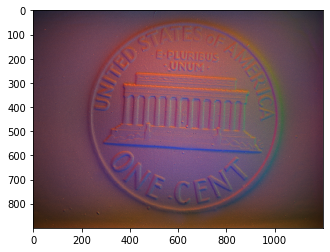

In [3]:
plt.imshow(img_crop)

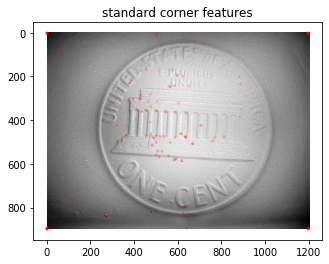

In [4]:
g_img = img_crop.mean(2)
def shi_tomasi(img_p,title):
    st_corners = feature.corner_shi_tomasi(img_p,4)
    st_corners_nms = feature.corner_peaks(st_corners,indices=False)

    st_corner_strengths = st_corners[st_corners_nms]
    st_corner_strengths /= st_corner_strengths.max()
    st_corner_locs = np.array(np.where(st_corners_nms)).T

    rgba_colors = np.zeros((len(st_corner_locs),4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = st_corner_strengths


    plt.imshow(img_p,cmap='Greys_r')
    plt.scatter(st_corner_locs[:,1],st_corner_locs[:,0],s=5,c=rgba_colors)

    plt.title(title)
shi_tomasi(g_img,'standard corner features')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'image without mean color\n assumes scene is overall flat')

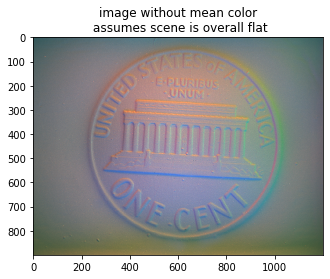

In [5]:
img_f = img_crop.astype(np.float)/255

# ASSUMES THE SCENE IS FLAT OVERALL
background_c = img_f.mean(axis=(0,1))
img_f -= background_c
plt.imshow(img_f+0.5)
plt.title('image without mean color\n assumes scene is overall flat')

/Users/lkeselma/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


Text(0.5, 1.0, 'average local background color')

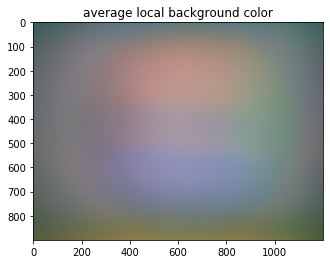

In [6]:

background_color = filters.gaussian(img_f,sigma=35)
plt.imshow(background_color+0.5)
plt.title('average local background color')

Text(0.5, 1.0, 'image without local mean color')

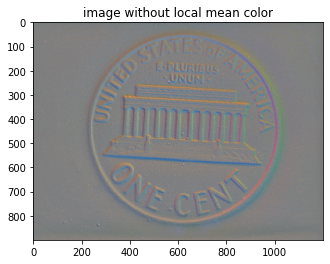

In [7]:
img_normals = img_f - background_color
img_sub = np.clip(img_normals+0.5,0,255)
plt.imshow(img_sub)
plt.title('image without local mean color')

Text(0.5, 1.0, 'normalized (normal)')

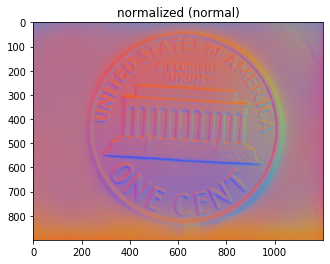

In [8]:
img_norm = np.linalg.norm(img_crop,axis=2)
plt.imshow(img_crop/img_norm[:,:,None])
plt.title('normalized (normal)')

Text(0.5, 1.0, 'normalized (without local background color)')

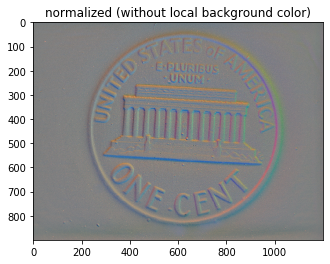

In [9]:
img_norm = np.linalg.norm(img_sub,axis=2)
img_corr = img_normals/img_norm[:,:,None]
plt.imshow(img_corr+0.5)
plt.title('normalized (without local background color)')

Text(0.5, 1.0, 'gradient magnitudes')

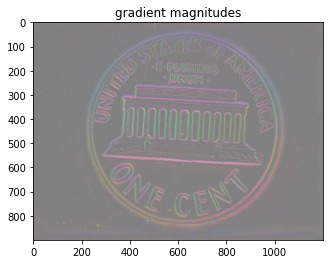

In [10]:
img_grad_mag = np.sqrt((img_corr)**2)
plt.imshow(img_grad_mag+0.5)
plt.title('gradient magnitudes')

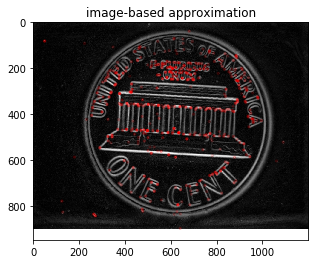

In [11]:
# lazy shi-tomasi on just this approx
grad_approx = img_grad_mag.mean(2)
shi_tomasi(grad_approx,'image-based approximation')

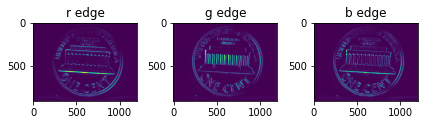

In [12]:
# i hope this is right...
SIGMA = 4
S1 = filters.gaussian(img_grad_mag[:,:,0]**2,sigma=SIGMA)
S2S3 = filters.gaussian(img_grad_mag[:,:,0]*img_grad_mag[:,:,1],sigma=SIGMA)
S4 = filters.gaussian(img_grad_mag[:,:,1]**2,sigma=SIGMA)
plt.subplot(1,3,1)
plt.imshow(S1)
plt.title('r edge')
plt.subplot(1,3,2)
plt.imshow(S4)
plt.title('g edge')
plt.subplot(1,3,3)
plt.imshow(S2S3)
plt.title('b edge')
plt.tight_layout()

Text(0.5, 1.0, 'corner strengths')

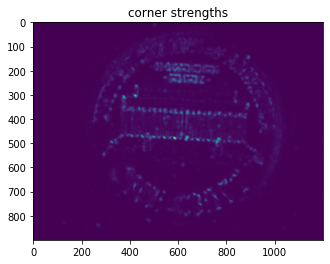

In [13]:
# smaller 2x2 eigenvalue
corner_resp = ((S1 + S4) - np.sqrt((S1 - S4)**2 + 4 * S2S3**2)) / 2
plt.imshow(corner_resp)
plt.title('corner strengths')

Text(0.5, 1.0, 'natural corners')

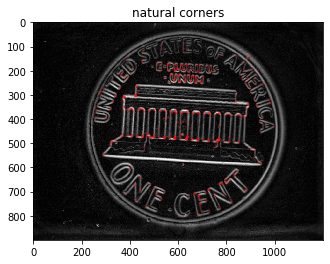

In [14]:
st_corners2 = corner_resp
st_corners_nms2 = feature.corner_peaks(st_corners2,indices=False)

st_corner_strengths2 = st_corners2[st_corners_nms2]
st_corner_strengths2 /= st_corner_strengths2.max()
st_corner_locs2 = np.array(np.where(st_corners_nms2)).T

rgba_colors2 = np.zeros((len(st_corner_locs2),4))
rgba_colors2[:,0] = 1.0
rgba_colors2[:, 3] = st_corner_strengths2


plt.imshow(grad_approx,cmap='Greys_r')
plt.scatter(st_corner_locs2[:,1],st_corner_locs2[:,0],s=5,c=rgba_colors2)

plt.title('natural corners')